## A2- Text Classification

- load libraries

In [10]:
import pandas as pd
import re
from matplotlib import pyplot as plt
import numpy as np

- Load data

In [11]:
# Open the file
with open("./data/spam_data.txt", "r") as f:
    rawdata = f.readlines()

data = [line.strip().split('\t',1) for line in rawdata]

# Converting to a dataframe
df = pd.DataFrame(data, columns=['Label', 'Text'])
df.head(10)

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [14]:
## tokenization
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


tokenizer = TweetTokenizer()

def clear_text(text):
    # tokenize the text
    # nltk.download('punkt') # uncomment if you need to download the punkt package
    tokens = tokenizer.tokenize(text)
    
    # remove all tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # make lowercase
    tokens = [word.lower() for word in tokens]

    # remove all tokens that are only one character
    tokens = [word for word in tokens if len(word) > 1]
    stop_words = stopwords.words('english') # def stop words 
    tokens = [word for word in tokens if word not in stop_words] 
    lemmatizer = nltk.WordNetLemmatizer() # lemmatize each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Preprocessing

In [16]:
df['clean_text']=df.Text.apply(lambda x: clear_text(x))   

In [17]:
df.head(10)

,Label,Text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling word back like fun still t...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile month entitled update latest colour mob...


In [18]:
df.shape

(5574, 3)

In [19]:
df['Label'].unique()

array(['ham', 'spam'], dtype=object)

In [20]:
##df = pd.get_dummies(
 #   df, 
 #   prefix_sep='_', 
 #   dummy_na=False, 
 #   drop_first=False, 
 #   columns=['Label'], 
 #   dtype='int32'
#)
#
##df.head(10)

- Encoding the target variable 

In [21]:
df['encoding'] = df['Label'].apply(lambda x: 0 if x.lower() == 'ham' else 1 )
df.head(10)

,Label,Text,clean_text,encoding
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...,1
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling word back like fun still t...,1
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...,0
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...,1
9,spam,Had your mobile 11 months or more? U R entitle...,mobile month entitled update latest colour mob...,1


In [22]:
h=s=0
for i in range(0,len(df['Label'])-1):
    if df.iloc[i,df.columns.get_loc('Label')] == 'ham':
        h +=1
    elif df.iloc[i,df.columns.get_loc('Label')] == 'spam':
        s +=1
print('spam count:',s,'Ham count:',h)

spam count: 747 Ham count: 4826


- A class imbalanced set

In [23]:
X = df.drop(['Text'],axis=1)
y =df['encoding']

- splitting the data

In [30]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     -------------------------------------- 59.1/59.1 kB 788.1 kB/s eta 0:00:00
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 2.0

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4459, 3), (1115, 3), (4459,), (1115,))

In [33]:
X_train.isna().sum(), X_test.isna().sum()

(Label         0
 clean_text    0
 encoding      0
 dtype: int64,
 Label         0
 clean_text    0
 encoding      0
 dtype: int64)

- Vectorizing the Train set and converting in to array

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
tfidf = vectorizer.fit_transform(X_train['clean_text'])

tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.isna().sum())

tfidf_df.head(10)

aa             0
aah            0
aaniye         0
aaooooright    0
aathi          0
              ..
zindgi         0
zoe            0
zogtorius      0
zoom           0
zouk           0
Length: 5000, dtype: int64


,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zac,zebra,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_train.shape, tfidf_df.shape

((4459, 3), (4459, 5000))

- Concating the Vectors 

In [36]:
X_train = X_train.reset_index(drop=True) # index drop to concat
X_train = pd.concat([X_train,tfidf_df],axis=1)
X_train.shape

(4459, 5003)

In [37]:
X_train.isna().sum()

Label         0
clean_text    0
encoding      0
aa            0
aah           0
             ..
zindgi        0
zoe           0
zogtorius     0
zoom          0
zouk          0
Length: 5003, dtype: int64

In [38]:
X_train = X_train.drop(['clean_text','Label'],axis=1) # drop unwanted columns
X_train.isna().sum()

encoding       0
aa             0
aah            0
aaniye         0
aaooooright    0
              ..
zindgi         0
zoe            0
zogtorius      0
zoom           0
zouk           0
Length: 5001, dtype: int64

- Transforming the test set

In [39]:
tfidf = vectorizer.transform(X_test['clean_text'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())

X_test = X_test.reset_index(drop=True) # need to do this, since X_train and tfidf_df have different indices
X_test = pd.concat([X_test, tfidf_df], axis=1)
X_test = X_test.drop(['clean_text','Label'],axis=1)

X_test.shape

(1115, 5001)

In [40]:
X_test

,encoding,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,zac,zebra,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1111,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1112,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1113,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating a Reduced Dimensions Dataset

In [41]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1500, n_iter=10) #n_components is the number of topics, which should be less than the number of features, and number of rows in the matrix

X_train_dim_reduct = svd.fit_transform(X_train)
X_test_dim_reduct = svd.transform(X_test)

In [42]:
X_train_dim_reduct.shape, X_test_dim_reduct.shape

((4459, 1500), (1115, 1500))

## Model Testing

### Random forest with dimension reduction

In [43]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
%%time

rf_clf = RandomForestClassifier(n_estimators=2000, max_leaf_nodes=50, n_jobs=-1).fit(X_train_dim_reduct, y_train)

CPU times: total: 9min 46s
Wall time: 40 s


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [47]:
%time

model_preds = rf_clf.predict(X_test_dim_reduct)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Random Forest dim reduction", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

CPU times: total: 0 ns
Wall time: 0 ns


,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.95426,1.0,0.68323,0.811808


In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

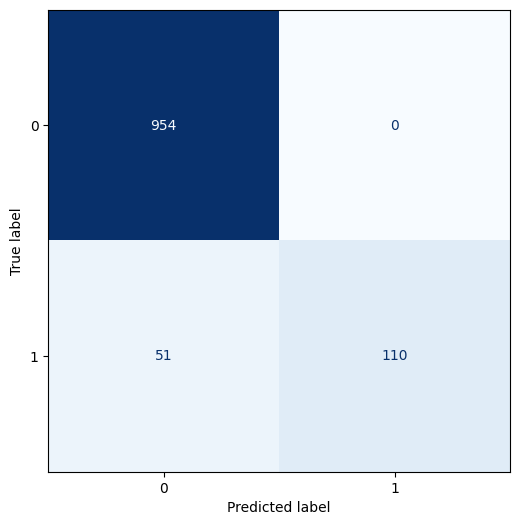

In [49]:
# display the confusion matrix
cm = confusion_matrix(y_test, model_preds)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_, colorbar=False)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, model_preds, display_labels=[0,1], ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

### Random forest with no dimension reduction

In [50]:
%%time

rf_clf = RandomForestClassifier(n_estimators=2000, max_leaf_nodes=50, n_jobs=-1).fit(X_train, y_train)

CPU times: total: 1min 2s
Wall time: 6.7 s


In [51]:
%time

model_preds = rf_clf.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Random Forest default ", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

CPU times: total: 0 ns
Wall time: 0 ns


,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778


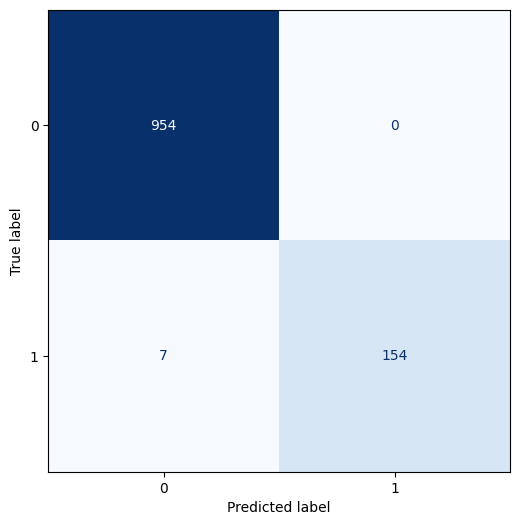

In [52]:
# display the confusion matrix
cm = confusion_matrix(y_test, model_preds)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_, colorbar=False)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, model_preds, display_labels=[0,1], ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

* summary from above:
- Dimension reduction has negative effect on the random forest classifier so its better to use normal dimensions than reduced dimensions.
- Since the data set is a class imbalanced we can have choose the precision as our metric.


In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#random with random forest
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(2,10),  
    'min_samples_leaf': np.arange(2,10),
    'max_leaf_nodes': np.arange(5, 15), 
    'max_depth': np.arange(2,10), 
    'criterion': ['entropy', 'gini'],
}

rf = RandomForestClassifier()
rand_search_rf = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)


In [54]:
%time
_ = rand_search_rf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [55]:
%time

model_preds = rand_search_rf.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Random Forest hyper tuned ", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

CPU times: total: 0 ns
Wall time: 0 ns


,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793


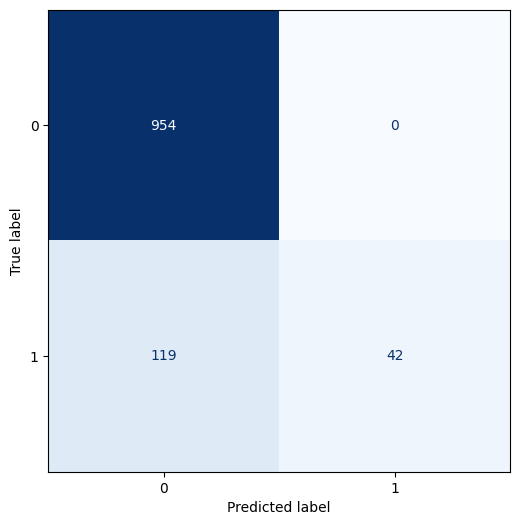

In [56]:
cm = confusion_matrix(y_test, model_preds)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, model_preds, display_labels=[0,1], ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

- Summary:
Hyper tuning has a negative effect on the precision and accuracy score.

### Decision Tree 

In [57]:
from sklearn.tree import DecisionTreeClassifier 

In [58]:
Dtree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5).fit(X_train_dim_reduct, y_train)

In [59]:
model_preds = Dtree.predict(X_test_dim_reduct)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Dtree dim reduced", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000


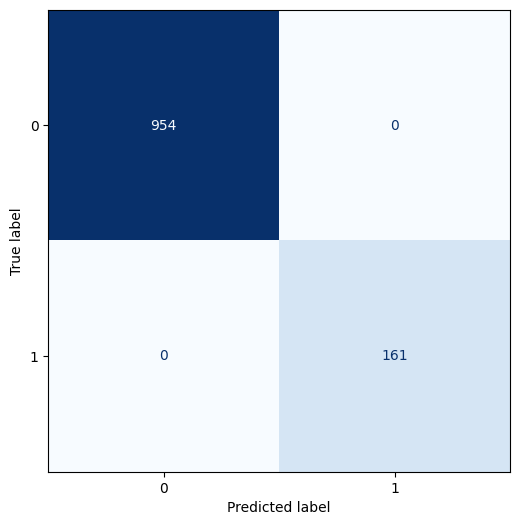

In [60]:
cm = confusion_matrix(y_test, model_preds)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, model_preds, display_labels=[0,1], ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

## DTree without dimension reduction 

In [61]:
Dtree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5).fit(X_train, y_train)

In [62]:
model_preds = Dtree.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Dtree default", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance


,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000
0,Dtree default,1.000000,1.0,1.000000,1.000000


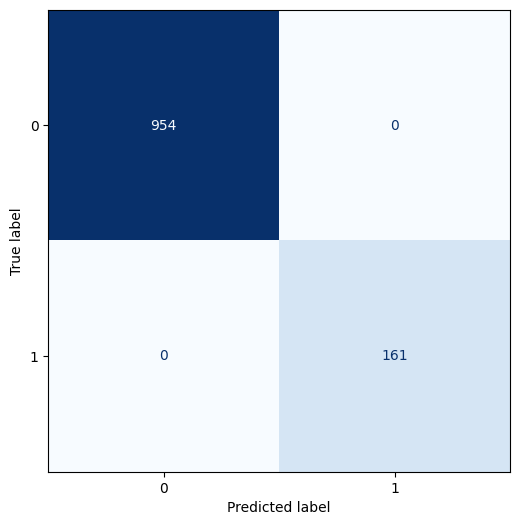

In [63]:
cm = confusion_matrix(y_test, model_preds)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, model_preds, display_labels=[0,1], ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

## Dtree with Hyper Tuning

In [64]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': [10,50,100],  
    'min_samples_leaf': [1,5,10],
    'min_impurity_decrease': [ 0.0010, 0.0020, 0.0050],
    'max_leaf_nodes': [10,25,50], 
    'max_depth': [5,10,20], 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search_dtree = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_dtree.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [65]:
model_preds = rand_search_dtree.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Dtree Hyper Tuned", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance


,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000
0,Dtree default,1.000000,1.0,1.000000,1.000000
0,Dtree Hyper Tuned,1.000000,1.0,1.000000,1.000000


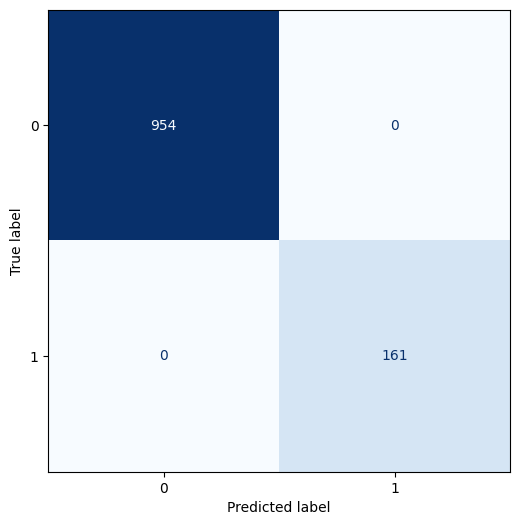

In [66]:
cm = confusion_matrix(y_test, model_preds)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, model_preds, display_labels=[0,1], ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

## MLP Classifier

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [68]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(100,150,240), solver='adam', max_iter=400)
_ = ann.fit(X_train, y_train)

CPU times: total: 11.7 s
Wall time: 13.9 s


In [69]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 141 ms
Wall time: 66.4 ms


In [70]:
%%time
model_preds = ann.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"MLP", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

CPU times: total: 78.1 ms
Wall time: 71.2 ms


,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000
0,Dtree default,1.000000,1.0,1.000000,1.000000
0,Dtree Hyper Tuned,1.000000,1.0,1.000000,1.000000
0,MLP,0.999103,1.0,0.993789,0.996885


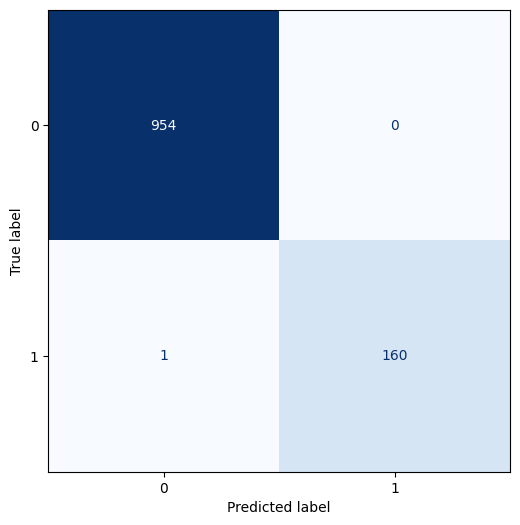

In [71]:
cm = confusion_matrix(y_test, model_preds)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, model_preds, display_labels=[0,1], ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

### MLP Hyper Tuned

In [72]:
mlp = MLPClassifier()
score_measure = 'precision'
param_grid = {
    'hidden_layer_sizes': [ (100, 100), (150, 100, 100)],  # Different hidden layer architectures
    'activation': ['relu'],
    'alpha': [0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant'],
}
rand_search_mlp = RandomizedSearchCV(estimator = mlp, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)
_ = rand_search_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\veera\anaconda3\envs\DEV\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [73]:
model_preds = rand_search_mlp.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"MLP Hyper tuned dim reduced", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000
0,Dtree default,1.000000,1.0,1.000000,1.000000
0,Dtree Hyper Tuned,1.000000,1.0,1.000000,1.000000
0,MLP,0.999103,1.0,0.993789,0.996885
0,MLP Hyper tuned dim reduced,0.999103,1.0,0.993789,0.996885


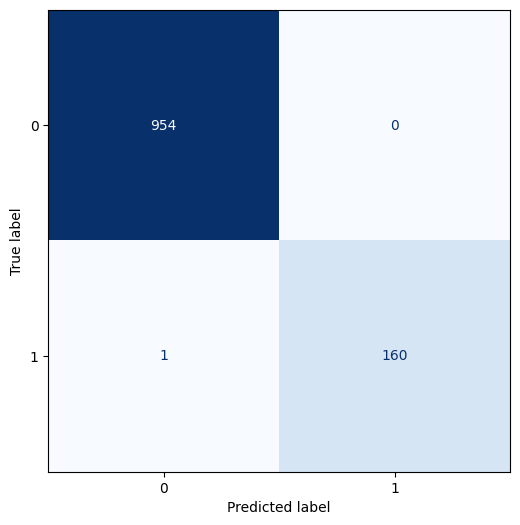

In [74]:
cm = confusion_matrix(y_test, model_preds)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, model_preds, display_labels=[0,1], ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

## AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
aboost = AdaBoostClassifier()
_ = aboost.fit(X_train, y_train)

In [77]:
model_preds = aboost.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Adaboost default", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000
0,Dtree default,1.000000,1.0,1.000000,1.000000
0,Dtree Hyper Tuned,1.000000,1.0,1.000000,1.000000
0,MLP,0.999103,1.0,0.993789,0.996885
0,MLP Hyper tuned dim reduced,0.999103,1.0,0.993789,0.996885
0,Adaboost default,1.000000,1.0,1.000000,1.000000


## Adaboost with dimension Reduction

In [78]:
aboost = AdaBoostClassifier()
_ = aboost.fit(X_train_dim_reduct, y_train)

In [79]:
model_preds = aboost.predict(X_test_dim_reduct)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Adaboost Dimension Reduced", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000
0,Dtree default,1.000000,1.0,1.000000,1.000000
0,Dtree Hyper Tuned,1.000000,1.0,1.000000,1.000000
0,MLP,0.999103,1.0,0.993789,0.996885
0,MLP Hyper tuned dim reduced,0.999103,1.0,0.993789,0.996885
0,Adaboost default,1.000000,1.0,1.000000,1.000000
0,Adaboost Dimension Reduced,1.000000,1.0,1.000000,1.000000


In [80]:
performance.sort_values(by='Precision')

,model,Accuracy,Precision,Recall,F1
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000
0,Dtree default,1.000000,1.0,1.000000,1.000000
0,Dtree Hyper Tuned,1.000000,1.0,1.000000,1.000000
0,MLP,0.999103,1.0,0.993789,0.996885
0,MLP Hyper tuned dim reduced,0.999103,1.0,0.993789,0.996885
0,Adaboost default,1.000000,1.0,1.000000,1.000000
0,Adaboost Dimension Reduced,1.000000,1.0,1.000000,1.000000


- Summary: Since the Precision values for each model is one we can say that model is overfit and need to choose the Accuracy as our metric.

In [81]:
performance.sort_values(by='Accuracy')

,model,Accuracy,Precision,Recall,F1
0,Random Forest hyper tuned,0.893274,1.0,0.260870,0.413793
0,Random Forest dim reduction,0.954260,1.0,0.683230,0.811808
0,Random Forest default,0.993722,1.0,0.956522,0.977778
0,MLP,0.999103,1.0,0.993789,0.996885
0,MLP Hyper tuned dim reduced,0.999103,1.0,0.993789,0.996885
0,Dtree dim reduced,1.000000,1.0,1.000000,1.000000
0,Dtree default,1.000000,1.0,1.000000,1.000000
0,Dtree Hyper Tuned,1.000000,1.0,1.000000,1.000000
0,Adaboost default,1.000000,1.0,1.000000,1.000000
0,Adaboost Dimension Reduced,1.000000,1.0,1.000000,1.000000


- Summary:
Based on the Accuracy values we can see that all the Dtree models, Adaboost models are getting 1's because we have a Unbalanced data with about spam count: 747 Ham count: 4826.  So these models are getting overfitted while Random forest model is not getting overfitted. While in the Random Forest dimension reduction has a negative order so dimension reductions doesnot have a effect.

- Based on above results I choose the Decision Tree and Random Forest models have been adapting to the data and would be a good choice to select for spam classification.